In [1]:
NCSym = SymmetricFunctionsNonCommutingVariables(QQ)
Nm = NCSym.m()
Ne = NCSym.e()
Nh = NCSym.h()
Np = NCSym.p()

Sym = SymmetricFunctions(QQ)
m = Sym.m()
e = Sym.e()
h = Sym.h()
p = Sym.p()

def NCchrom(G):
    f=0
    n=G.order()
    for S in subsets(list(G.edges())):
        H=Graph(S)
        C=H.connected_components()
        for i in G.vertices():
            if i not in H.vertices():
                C+=[[i]]
        f+=(-1)^(len(S))*Np[SetPartition(C)]
    return(f)

In [15]:
def is_equiv_mod(pi,rho,d):
    if pi.shape_partition()==rho.shape_partition():
        l=len(pi)
        index=[0,0]
        for i in range(l):
            if d in pi[i]:
                index[0]=i
            if d in rho[i]:
                index[1]=i
        return(len(pi[index[0]])==len(rho[index[1]]))
    else:
        return(False)

def equiv_class(pi,d):
    n=pi.size()
    return([rho for rho in SetPartitions(n) if is_equiv_mod(pi,rho,d)])


def equiv_func(G,d):
    F=Ne(G)
    supp=F.support()
    supps_used=[]
    ttl=0
    # print('support computed')
    for i in range(len(supp)):
        pi=supp[i]
        if not any([is_equiv_mod(pi,rho,d) for rho in supps_used]):
            ttl+=sum([F[rho] for rho in equiv_class(supp[i],d)])*Ne(pi)
            supps_used+=[pi]

    return(ttl)


In [3]:
def del_con(G,edge):
    if not G.has_edge(edge):
        raise Exception("The provided list is not an edge of your graph")
    if max(edge)!=G.order() or min(edge)!=G.order()-1:
        raise Exception("The edge must be of the form [d-1,d] if G has d vertices")
    H=G.copy()
    H.delete_edge(edge)
    K=G.copy()
    K.contract_edge(tuple(edge))
    return([H,K])

def induct(g):
    f=Np(g)
    supp=f.support()
    supps_used=[]
    ttl=0
    for i in range(len(supp)):
        pi=supp[i]
        d=pi.size()
        coef=f[pi]
        builder=[list(pi[j]) for j in range(len(pi))]
        for j in range(pi.cardinality()):
            if d in pi[j]:
                builder[j]+=[d+1]
        ttl+=coef*Np(SetPartition(builder))
    return(ttl)
    
    

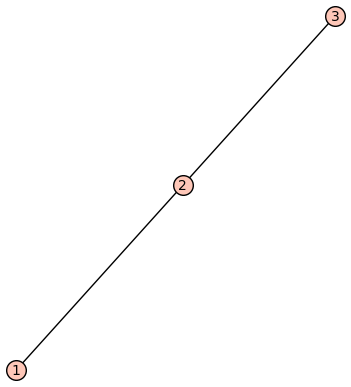

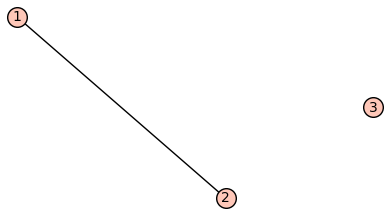

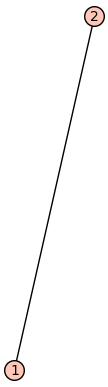

p{{1}, {2}, {3}} - p{{1}, {2, 3}} - p{{1, 2}, {3}} + p{{1, 2, 3}}
p{{1}, {2}, {3}} - p{{1}, {2, 3}} - p{{1, 2}, {3}} + p{{1, 2, 3}}


In [37]:
G=Graph([[1,2],[2,3]])
d=G.order()
E=G.edges()
G.show()
Y=NCchrom(G)
# print(Ne(Y))
# print(equiv_func(Y,3))
# print(e(G.chromatic_symmetric_function()))
print()
Lst=del_con(G,[2,3])
Lst[0].show()
Y1=NCchrom(Lst[0])
Lst[1].show()
Y2=NCchrom(Lst[1])
print(Y)
print(Y1-induct(Y2))
# print(Y1)
# print(Ne(Y1))
# print(equiv_func(Y,1))
# G=Graph([[1,3],[3,2]])
# d=G.order()
# E=G.edges()
# G.show()
# Y=NCchrom(G)
# print(Y)
# print(Ne(Y))
# print(equiv_func(Y,1))
# print(e(G.chromatic_symmetric_function()))

In [7]:
#s and t are number of vertices on path from triangles. 
#The s=1 means the *default value* is 1 for s, so this means if you just call Graph1(m), it will do so with s=1 and t=1
def Graph1(m,s=1,t=1):
    E=[[0,1],[0,m],[0,m+1],[0,m+1+s],[1,m+1],[m,m+s+1]]+[[1+i,2+i] for i in range(m-1)]
    E+=[[m+1+i,m+2+i] for i in range(s-1)]
    E+=[[m+s+1+i,m+s+2+i] for i in range(t-1)]
    G=Graph(E)
    G.relabel({i:i+1 for i in range(G.num_verts())})
    return(G)

def Graph2(s,t):
    E=[[1,0],[2,0],[1,2]]+[[2+i,2+i+1] for i in range(s)]
    E+=[[2+s,0],[3+s,0],[2+s,3+s]]+[[3+s+i,3+s+(i+1)] for i in range(t)]+[[3+s+t,1]]
    G=Graph(E)
    G.relabel({i:i+1 for i in range(G.num_verts())})
    return(G)

def Graph3(s,t):
    E=[[0,1],[0,s],[0,s+1],[0,s+t]]+[[1+i,2+i] for i in range(s)]+[[s+1+i,s+2+i] for i in range(t-1)]
    G=Graph(E)
    G.relabel({i:i+1 for i in range(G.num_verts())})
    return(G)

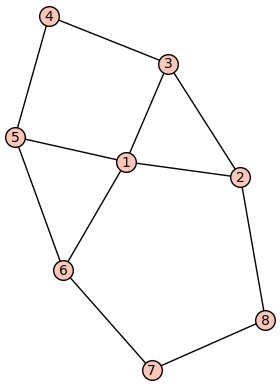

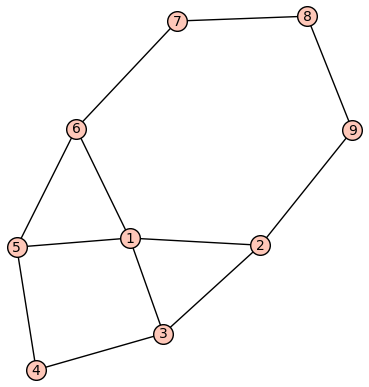

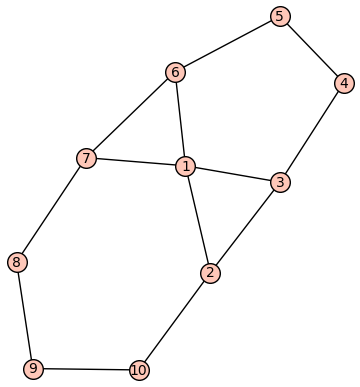

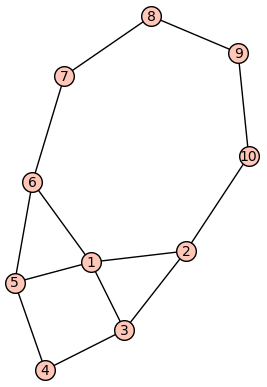

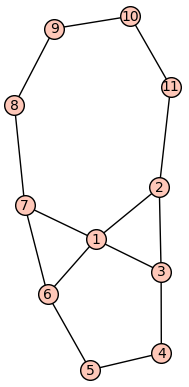

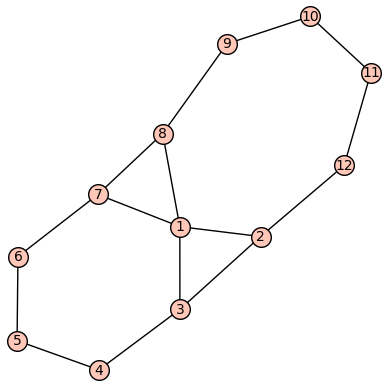

In [38]:
for t in range(2,5):
    for s in range(2,t+1):
        Graph2(s,t).show()
# for m in range(2,8):
#     G=Graph1(m)
#     G.show()
#     F=NCchrom(G)
#     print(equiv_func(F,5))
#     G.relabel({1:4,4:1})
#     print(equiv_func(NCchrom(G),5))
#     G.show()

s = 1   t = 2


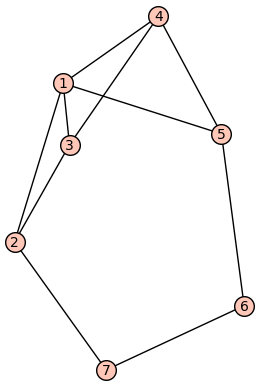

NCChrom computed
1/12*e{{1, 2, 3}, {4, 5, 6, 7}} + 7/24*e{{1, 2, 3, 4}, {5, 6, 7}} + 1/40*e{{1, 2, 3, 4, 5, 6}, {7}} + 1/24*e{{1, 2, 3, 4, 5, 6, 7}} + 7/120*e{{1, 2, 3, 4, 5, 7}, {6}} + 1/24*e{{1, 2, 3, 4, 7}, {5, 6}} + 1/12*e{{1, 3, 4}, {2, 7}, {5, 6}} + 1/8*e{{1, 3, 4, 5}, {2, 7}, {6}} + 1/4*e{{1, 3, 4, 5, 6}, {2, 7}}
2*e[3, 2, 2] + 6*e[4, 2, 1] + 54*e[4, 3] + 70*e[5, 2] + 60*e[6, 1] + 210*e[7]


In [19]:
for t in [2]:
    for s in [1]:
        H=Graph2(s,t)
        # H=Graph([[i,i+1] for i in range(1,7)])
        print('s =',s,'  t =',t)
        H.show()
        # print(e(G.chromatic_symmetric_function()))
        F=NCchrom(H)
        print('NCChrom computed') 
        # print(F)
        # print(Ne(F))
        d=H.num_verts()
        print(equiv_func(F,d))
        print(e(H.chromatic_symmetric_function()))

In [120]:
for m in range(3,9):
    G=Graph1(m,2,3)
    print(e(G.chromatic_symmetric_function()))

2*e[3, 2, 2, 2] + 10*e[3, 3, 2, 1] + 14*e[4, 2, 2, 1] + 6*e[4, 3, 1, 1] + 44*e[4, 3, 2] + 12*e[4, 4, 1] + 16*e[5, 2, 1, 1] + 70*e[5, 2, 2] + 52*e[5, 3, 1] + 32*e[5, 4] + 160*e[6, 2, 1] + 72*e[6, 3] + 54*e[7, 1, 1] + 200*e[7, 2] + 156*e[8, 1] + 108*e[9]
e[3, 2, 2, 2, 1] + 15*e[3, 3, 2, 2] + 8*e[3, 3, 3, 1] + 3*e[4, 2, 2, 1, 1] + 16*e[4, 2, 2, 2] + 59*e[4, 3, 2, 1] + 37*e[4, 3, 3] + 9*e[4, 4, 1, 1] + 32*e[4, 4, 2] + 64*e[5, 2, 2, 1] + 16*e[5, 3, 1, 1] + 133*e[5, 3, 2] + 43*e[5, 4, 1] + 20*e[5, 5] + 45*e[6, 2, 1, 1] + 176*e[6, 2, 2] + 128*e[6, 3, 1] + 32*e[6, 4] + 320*e[7, 2, 1] + 155*e[7, 3] + 91*e[8, 1, 1] + 352*e[8, 2] + 245*e[9, 1] + 160*e[10]
2*e[3, 2, 2, 2, 2] + 12*e[3, 3, 2, 2, 1] + 14*e[3, 3, 3, 2] + 14*e[4, 2, 2, 2, 1] + 12*e[4, 3, 2, 1, 1] + 96*e[4, 3, 2, 2] + 52*e[4, 3, 3, 1] + 60*e[4, 4, 2, 1] + 92*e[4, 4, 3] + 16*e[5, 2, 2, 1, 1] + 64*e[5, 2, 2, 2] + 180*e[5, 3, 2, 1] + 76*e[5, 3, 3] + 36*e[5, 4, 1, 1] + 146*e[5, 4, 2] + 40*e[5, 5, 1] + 174*e[6, 2, 2, 1] + 50*e[6, 3, 1, 1] + 

In [303]:
Graph.relabel??

Signature:
Graph.relabel(
    self,
    perm=None,
    inplace=True,
    return_map=False,
    check_input=True,
    complete_partial_function=True,
    immutable=None,
)
Docstring:
   Relabels the vertices of "self"

   INPUT:

      * "perm" -- a function, dictionary, iterable, permutation, or
        "None" (default: "None")

      * "inplace" -- a boolean (default: "True")

      * "return_map" -- a boolean (default: "False")

      * "check_input" (boolean) -- whether to test input for
        correctness. *This can potentially be very time-consuming !*.

      * "complete_partial_function" (boolean) -- whether to
        automatically complete the permutation if some elements of the
        graph are not associated with any new name. In this case,
        those elements are not relabeled *This can potentially be very
        time-consuming !*.

      * "immutable" (boolean) -- with "inplace=False", whether to
        create a mutable/immutable relabelled copy. "immutable=None"
  

In [305]:
dict={i:i+1 for i in range(3)}
print(dict)

{0: 1, 1: 2, 2: 3}
